# Predicting Critical Heat Flux

In [69]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [86]:
!wget https://raw.githubusercontent.com/isa229/Critical-Heat-Flux-ML/main/data/Data_CHF_Zhao_2020_ATE.csv
data = pd.read_csv("Data_CHF_Zhao_2020_ATE.csv")

--2021-12-15 21:58:37--  https://raw.githubusercontent.com/isa229/Critical-Heat-Flux-ML/main/data/Data_CHF_Zhao_2020_ATE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102988 (101K) [text/plain]
Saving to: ‘Data_CHF_Zhao_2020_ATE.csv’

Data_CHF_Zhao_2020_ 100%[===================>] 100.57K  --.-KB/s    in 0.007s  

2021-12-15 21:58:37 (13.8 MB/s) - ‘Data_CHF_Zhao_2020_ATE.csv’ saved [102988/102988]



In [4]:
data.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [6]:
clean_data = data.drop((["id", "author"]), axis =1)

In [8]:
clean_data.head()

,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [26]:
dummy = pd.get_dummies(clean_data["geometry"])
dummy.head()

,annulus,plate,tube
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [34]:
clean_data = clean_data.merge(dummy, left_index= True, right_index = True)
clean_data.drop("geometry", axis = 1, inplace = True)

In [35]:
clean_data.describe()

,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],annulus,plate,tube
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638,0.202681,0.025737,0.771582
std,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535,0.402105,0.158393,0.419926
min,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000,0.000000,0.000000,0.000000
25%,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000,0.000000,0.000000,1.000000
50%,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000,0.000000,0.000000,1.000000
75%,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000,0.000000,0.000000,1.000000
max,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000,1.000000,1.000000,1.000000


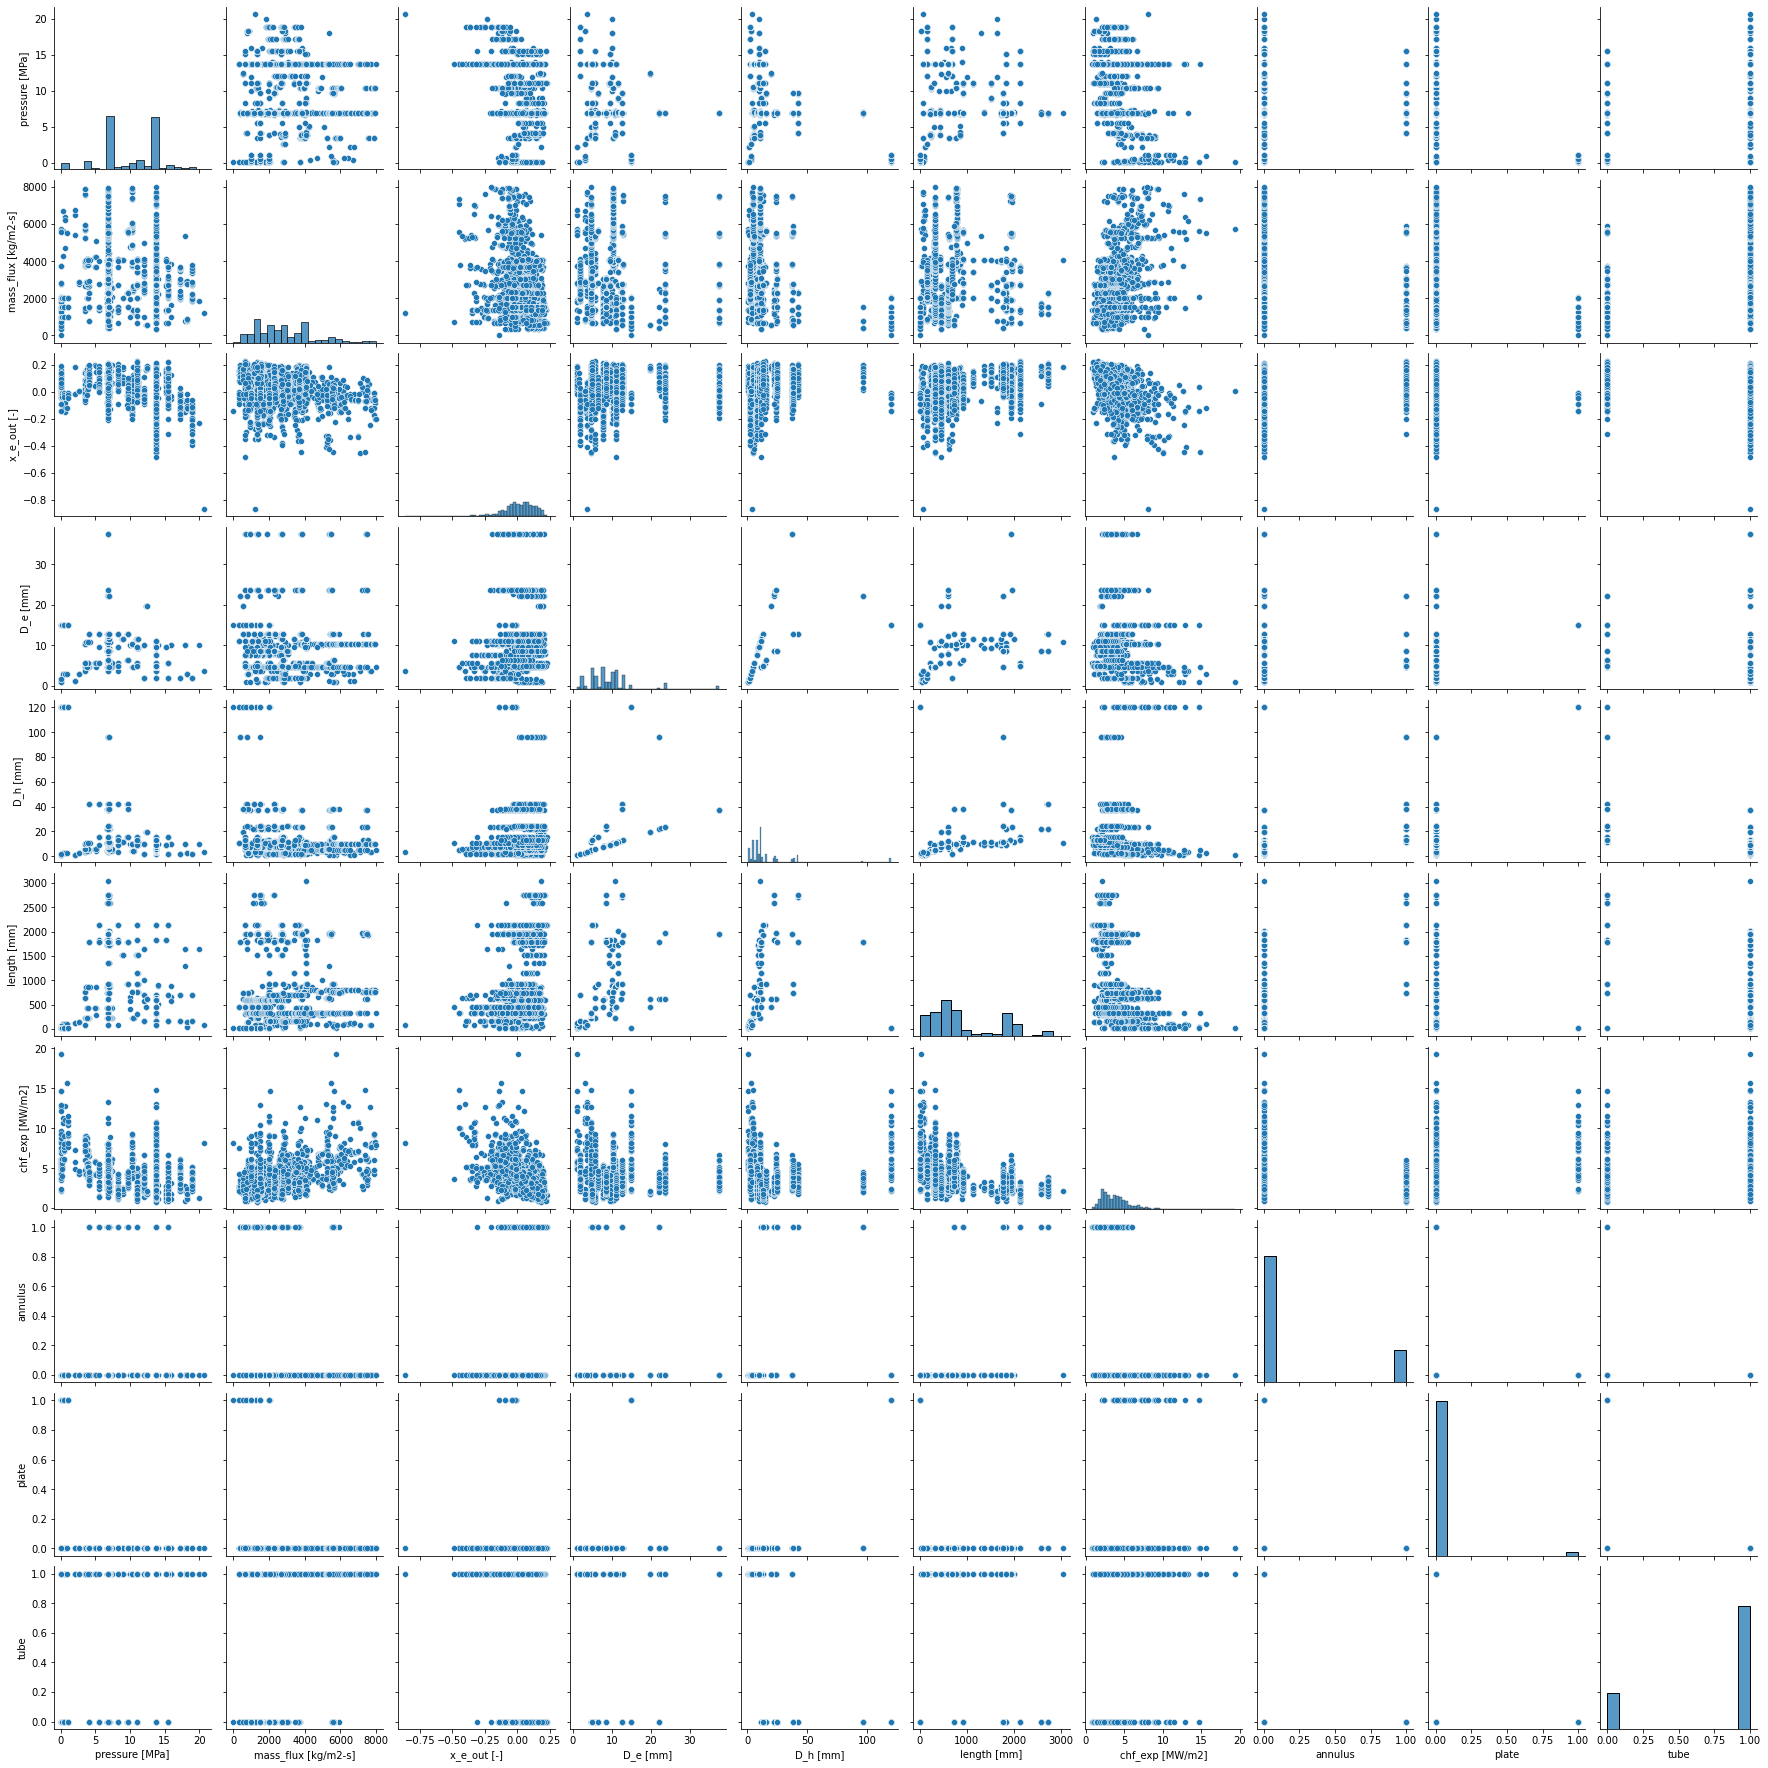

In [36]:
import seaborn as sns
pp = sns.pairplot(clean_data)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = clean_data.drop("chf_exp [MW/m2]", axis = 1)
y = clean_data["chf_exp [MW/m2]"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## LINEAR REGRESSION

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_predlr = model.predict(X_test)

### Error evaluation

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
MSE = mean_squared_error(y_test, y_predlr)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predlr)

print("The MSE is {}\nThe RMSE is {}\nThe r2_score is {}".format(MSE, RMSE, R2))

The MSE is 1.429968010978128
The RMSE is 1.1958126989533637
The r2_score is 0.7000462760227684


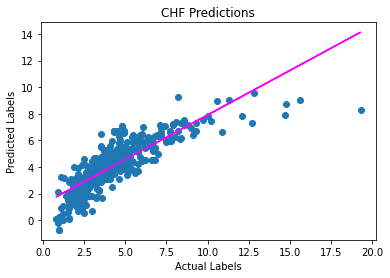

In [71]:
# Plot predicted vs actual
plt.scatter(y_test, y_predlr)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CHF Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predlr, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## LASSO

In [65]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
y_predla = model.predict(X_test)

### Evaluate the errors

In [67]:
MSE = mean_squared_error(y_test, y_predla)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predla)

print("The MSE is {}\nThe RMSE is {}\nThe r2_score is {}".format(MSE, RMSE, R2))

The MSE is 2.379272418597101
The RMSE is 1.5424890335419246
The r2_score is 0.5009177710021997


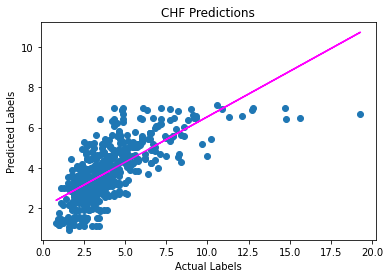

In [70]:
# Plot predicted vs actual
plt.scatter(y_test, y_predla)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CHF Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predla, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## RIDGE

In [73]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
y_predri = model.predict(X_test)

### Evaluate the errors

In [74]:
MSE = mean_squared_error(y_test, y_predri)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predri)

print("The MSE is {}\nThe RMSE is {}\nThe r2_score is {}".format(MSE, RMSE, R2))

The MSE is 1.4363636929697319
The RMSE is 1.1984839143558548
The r2_score is 0.698704701514788


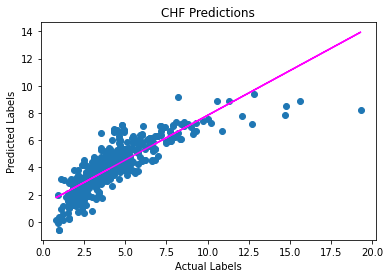

In [75]:
# Plot predicted vs actual
plt.scatter(y_test, y_predri)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CHF Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predri, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## DECISION TREE REGRESSOR

In [76]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predtr = model.predict(X_test)

### Evaluate the errors

In [77]:
MSE = mean_squared_error(y_test, y_predtr)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predtr)

print("The MSE is {}\nThe RMSE is {}\nThe r2_score is {}".format(MSE, RMSE, R2))

The MSE is 1.1420535714285716
The RMSE is 1.0686690654400788
The r2_score is 0.7604399405430218


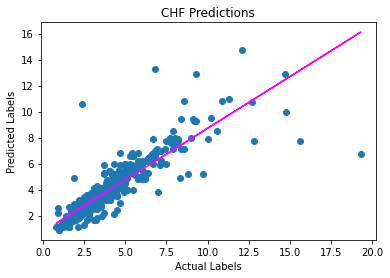

In [78]:
# Plot predicted vs actual
plt.scatter(y_test, y_predtr)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CHF Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predtr, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## RANDOM FOREST REGRESSOR

In [79]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_predrf = model.predict(X_test)

###Evaluate the errors

In [81]:
MSE = mean_squared_error(y_test, y_predrf)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predrf)

print("The MSE is {}\nThe RMSE is {}\nThe r2_score is {}".format(MSE, RMSE, R2))

The MSE is 0.5142366017857142
The RMSE is 0.7171029227284701
The r2_score is 0.8921324235739279


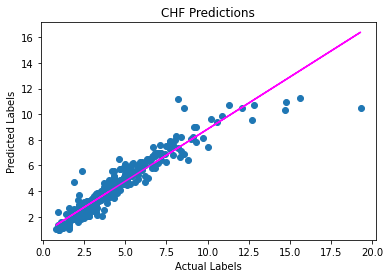

In [82]:
# Plot predicted vs actual
plt.scatter(y_test, y_predrf)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CHF Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predrf, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## GRADIENT BOOSTING REGRESSOR

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_predGBR = model.predict(X_test)

### Evaluate the errors

In [84]:
MSE = mean_squared_error(y_test, y_predGBR)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predGBR)

print("The MSE is {}\nThe RMSE is {}\nThe r2_score is {}".format(MSE, RMSE, R2))

The MSE is 0.44740340027005265
The RMSE is 0.6688822020879706
The r2_score is 0.906151525767851


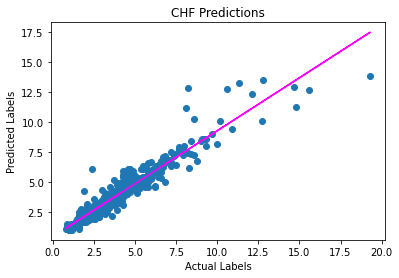

In [85]:
# Plot predicted vs actual
plt.scatter(y_test, y_predGBR)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CHF Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predGBR, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()